<a href="https://colab.research.google.com/github/b-fatma/S2I-DM/blob/mybranch/src/rf/RF_2_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:

import pandas as pd

file_path = '/content/drive/MyDrive/dm_fire_prediction/merge/merged_v2.csv'
df = pd.read_csv(file_path)

# check first rows
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965257 entries, 0 to 1965256
Data columns (total 41 columns):
 #   Column           Dtype  
---  ------           -----  
 0   longitude        float64
 1   latitude         float64
 2   fire             int64  
 3   lcccode_label    float64
 4   elevation        float64
 5   COARSE           float64
 6   SAND             float64
 7   SILT             float64
 8   CLAY             float64
 9   BULK             float64
 10  REF_BULK         float64
 11  ORG_CARBON       float64
 12  PH_WATER         float64
 13  TOTAL_N          float64
 14  CN_RATIO         float64
 15  CEC_SOIL         float64
 16  CEC_CLAY         float64
 17  CEC_EFF          float64
 18  TEB              float64
 19  BSAT             float64
 20  ALUM_SAT         float64
 21  ESP              float64
 22  TCARBON_EQ       float64
 23  GYPSUM           float64
 24  ELEC_COND        float64
 25  TEXTURE_USDA     float64
 26  prec_autumn      int64  
 27  prec_spring 

In [3]:
X=df.drop(columns=['fire'])
y=df['fire']

## Undersampling

In [ ]:
!pip install imbalanced-learn


### random undersampling

((44600, 40), (44600,), np.int64(12743))

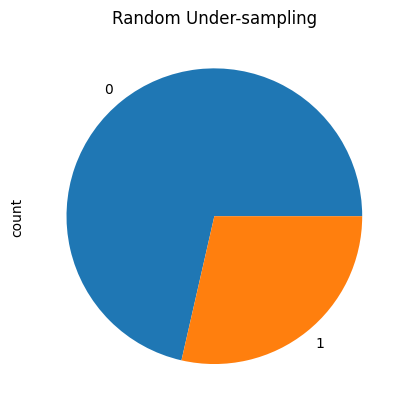

In [4]:
from imblearn.under_sampling import RandomUnderSampler
sampling_strategy = 0.4
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(X,y)
ax = y_res.value_counts().plot.pie()
_ = ax.set_title("Random Under-sampling")
X_res.shape, y_res.shape, y_res.sum()



In [5]:
#save in df_balanced_ru
df = pd.concat([X_res, y_res], axis=1)
df['fire'].value_counts()

,count
fire,
0,31857
1,12743


### Cluster Centroids Undersampling

In [ ]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(sampling_strategy=0.1)
X_res_c, y_res_c = cc.fit_resample(X_train, y_train)
ax = y_res_c.value_counts().plot.pie()
_ = ax.set_title("Cluster Centroids Under-sampling")
X_res_c.shape, y_res_c.shape, y_res_c.sum()



In [ ]:
test=pd.concat([X_res_c,y_res_c],axis=1)
test['fire'].value_counts()


In [ ]:
X_train.info()

In [ ]:
X_test.info()

In [ ]:
X_train=X_res
y_train=y_res

## Split Data

In [6]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X = df.drop(columns=['fire'])
y = df['fire']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
y_test.value_counts()

,count
fire,
0,6420
1,2500


## Feature Engineering

### Feature Selection

#### Recursive Feature Elimination

In [ ]:
X_train.info()

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_

selected = X.columns[importances.argsort()[::-1][:25]]
print(selected)

Index(['longitude', 'elevation', 'latitude', 'prec_spring', 'prec_autumn',
       'prec_winter', 'tmin_summer', 'tmin_autumn', 'lcccode_label',
       'prec_summer', 'tmax_summer', 'tmax_autumn', 'tmax_spring',
       'tmin_winter', 'tmax_winter', 'CEC_CLAY', 'tmin_spring', 'PH_WATER',
       'CEC_EFF', 'TCARBON_EQ', 'TEB', 'CLAY', 'SILT', 'BULK', 'ELEC_COND'],
      dtype='object')


In [9]:
X_train = X_train[selected]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35680 entries, 1396549 to 789671
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   longitude      35680 non-null  float64
 1   elevation      35680 non-null  float64
 2   latitude       35680 non-null  float64
 3   prec_spring    35680 non-null  int64  
 4   prec_autumn    35680 non-null  int64  
 5   prec_winter    35680 non-null  int64  
 6   tmin_summer    35680 non-null  int64  
 7   tmin_autumn    35680 non-null  int64  
 8   lcccode_label  35680 non-null  float64
 9   prec_summer    35680 non-null  int64  
 10  tmax_summer    35680 non-null  int64  
 11  tmax_autumn    35680 non-null  int64  
 12  tmax_spring    35680 non-null  int64  
 13  tmin_winter    35680 non-null  int64  
 14  tmax_winter    35680 non-null  int64  
 15  CEC_CLAY       35680 non-null  float64
 16  tmin_spring    35680 non-null  int64  
 17  PH_WATER       35680 non-null  float64
 18  CEC_

In [10]:
X_train=X_train.drop(columns=['longitude','latitude'])

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35680 entries, 1396549 to 789671
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   elevation      35680 non-null  float64
 1   prec_spring    35680 non-null  int64  
 2   prec_autumn    35680 non-null  int64  
 3   prec_winter    35680 non-null  int64  
 4   tmin_summer    35680 non-null  int64  
 5   tmin_autumn    35680 non-null  int64  
 6   lcccode_label  35680 non-null  float64
 7   prec_summer    35680 non-null  int64  
 8   tmax_summer    35680 non-null  int64  
 9   tmax_autumn    35680 non-null  int64  
 10  tmax_spring    35680 non-null  int64  
 11  tmin_winter    35680 non-null  int64  
 12  tmax_winter    35680 non-null  int64  
 13  CEC_CLAY       35680 non-null  float64
 14  tmin_spring    35680 non-null  int64  
 15  PH_WATER       35680 non-null  float64
 16  CEC_EFF        35680 non-null  float64
 17  TCARBON_EQ     35680 non-null  float64
 18  TEB 

### Feature Scaling

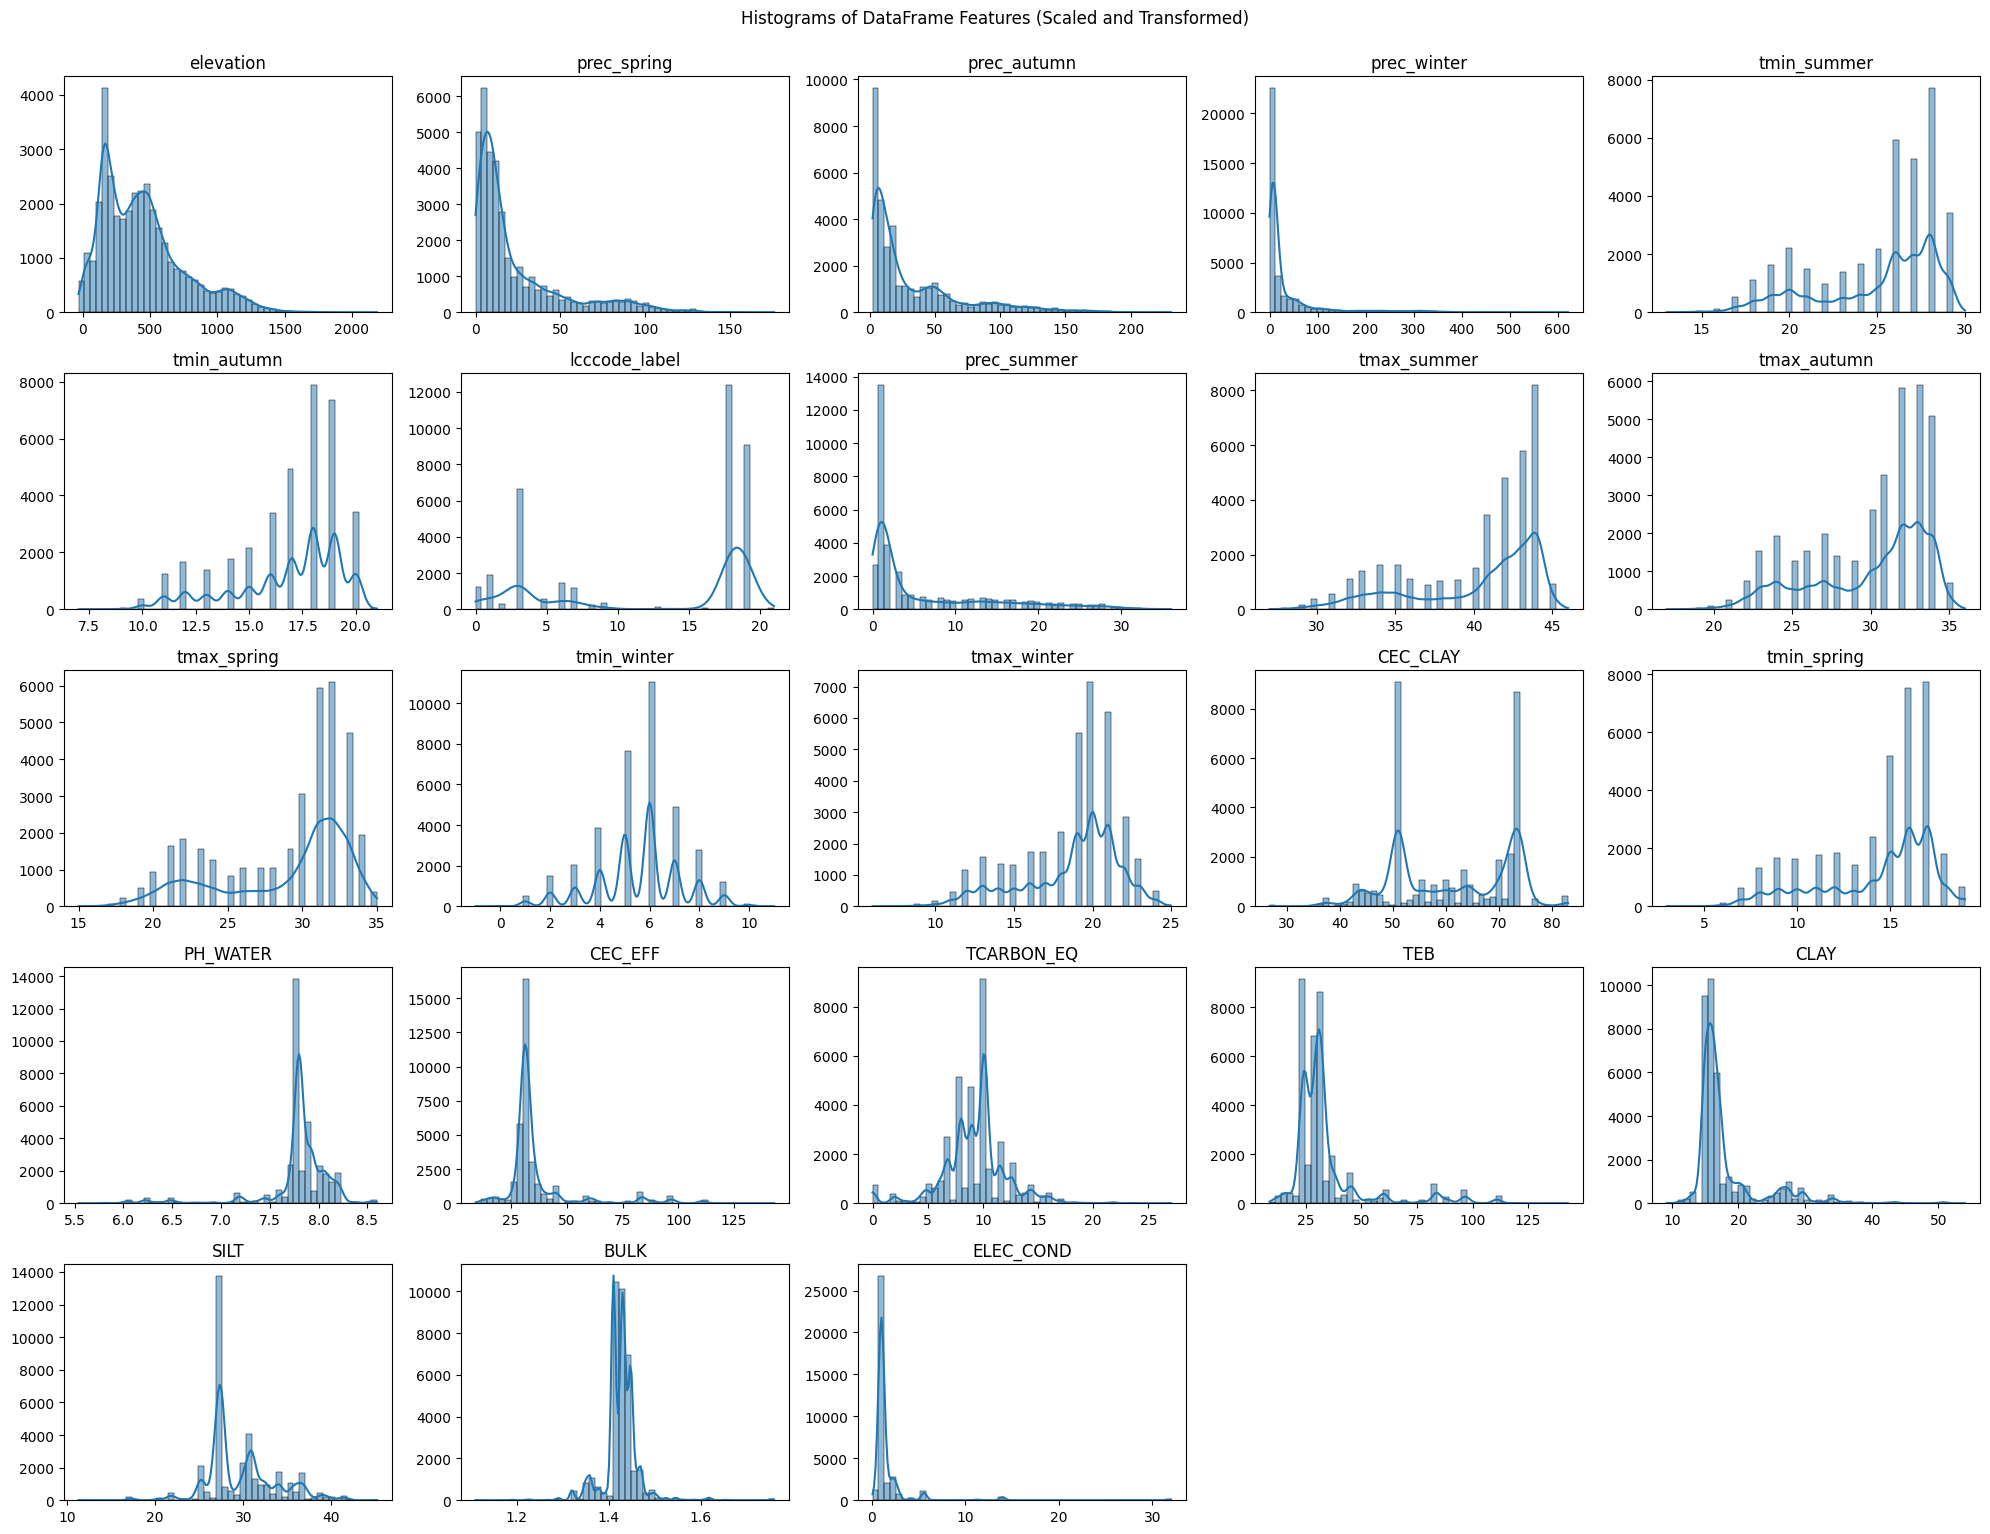

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Get all numerical columns from X_train_scaled, excluding the target variable 'fire'
numerical_cols_to_plot = X_train.select_dtypes(include=['float64', 'int64']).columns.drop('fire', errors='ignore')

# Calculate grid dimensions dynamically
num_plots = len(numerical_cols_to_plot)
num_cols = 5 # Maximum 5 columns for better readability
num_rows = math.ceil(num_plots / num_cols)

plt.figure(figsize=(num_cols * 4, num_rows * 3))
for i, col in enumerate(numerical_cols_to_plot):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(X_train[col], kde=True, bins=50) # Explicitly setting bins to prevent ValueError
    plt.title(col)
    plt.xlabel('') # Clear x-axis label to avoid clutter in subplots
    plt.ylabel('') # Clear y-axis label
plt.tight_layout()
plt.suptitle('Histograms of DataFrame Features (Scaled and Transformed)', y=1.02) # Add a main title
plt.show()

#### box-cox transformation

#### prec transformation (yeo-jhonson transformation)

In [13]:
from sklearn.preprocessing import PowerTransformer

# Select precipitation columns
prec_cols = ['prec_autumn', 'prec_spring', 'prec_summer', 'prec_winter']

# Initialize Yeo-Johnson transformer
pt_yj = PowerTransformer(method='yeo-johnson', standardize=True)

# Fit and transform the precipitation columns
X_train[prec_cols] = pt_yj.fit_transform(X_train[prec_cols])

# Check transformed values
print(X_train[prec_cols].describe())


        prec_autumn   prec_spring   prec_summer   prec_winter
count  3.568000e+04  3.568000e+04  3.568000e+04  3.568000e+04
mean   5.165773e-16 -3.461108e-16  3.182307e-16  7.029753e-17
std    1.000014e+00  1.000014e+00  1.000014e+00  1.000014e+00
min   -1.831705e+00 -2.175309e+00 -1.815248e+00 -3.199102e+00
25%   -9.004084e-01 -6.150465e-01 -7.296903e-01 -5.453150e-01
50%   -2.166707e-02 -7.732580e-02 -2.089918e-01 -1.885218e-01
75%    8.941282e-01  7.137413e-01  1.030535e+00  7.236347e-01
max    2.083115e+00  2.435865e+00  1.767569e+00  2.228099e+00


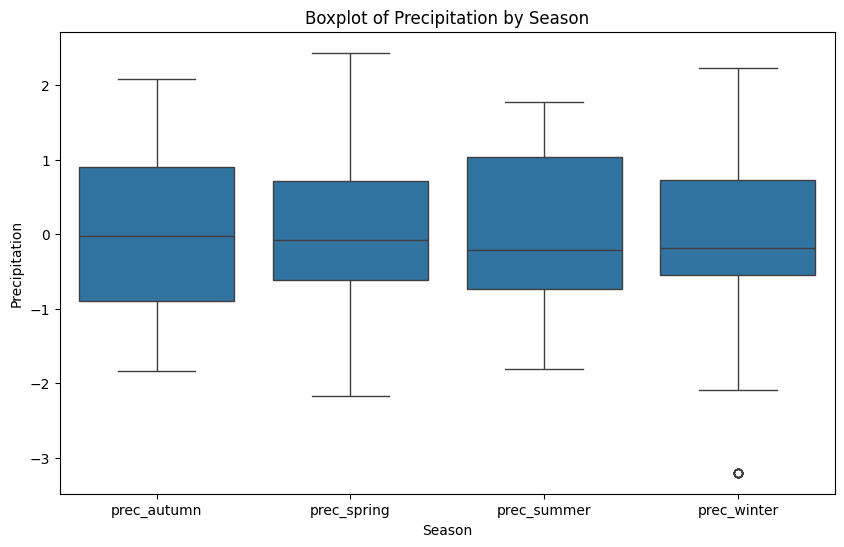

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select precipitation columns
prec_cols = ['prec_autumn', 'prec_spring', 'prec_summer', 'prec_winter']

# Melt the dataframe to long format for seaborn
prec_long = X_train[prec_cols].melt(var_name='Season', value_name='Precipitation')

# Plot boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='Season', y='Precipitation', data=prec_long)
plt.title('Boxplot of Precipitation by Season')
plt.ylabel('Precipitation')
plt.xlabel('Season')
plt.show()


In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35680 entries, 1396549 to 789671
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   elevation      35680 non-null  float64
 1   prec_spring    35680 non-null  float64
 2   prec_autumn    35680 non-null  float64
 3   prec_winter    35680 non-null  float64
 4   tmin_summer    35680 non-null  int64  
 5   tmin_autumn    35680 non-null  int64  
 6   lcccode_label  35680 non-null  float64
 7   prec_summer    35680 non-null  float64
 8   tmax_summer    35680 non-null  int64  
 9   tmax_autumn    35680 non-null  int64  
 10  tmax_spring    35680 non-null  int64  
 11  tmin_winter    35680 non-null  int64  
 12  tmax_winter    35680 non-null  int64  
 13  CEC_CLAY       35680 non-null  float64
 14  tmin_spring    35680 non-null  int64  
 15  PH_WATER       35680 non-null  float64
 16  CEC_EFF        35680 non-null  float64
 17  TCARBON_EQ     35680 non-null  float64
 18  TEB 

#### cool and cold seasons for tmin and tmax

In [16]:
tmin_cols=['tmin_autumn','tmin_spring','tmin_summer','tmin_winter']
tmax_cols=['tmax_autumn','tmax_spring','tmax_summer','tmax_winter']
X_train['tmax_cool']=X_train[['tmax_summer','tmax_spring']].mean(axis=1)
X_train['tmax_cold']=X_train[['tmax_autumn','tmax_winter']].mean(axis=1)
X_train['tmin_cool']=X_train[['tmin_summer','tmin_spring']].mean(axis=1)
X_train['tmin_cold']=X_train[['tmin_autumn','tmin_winter']].mean(axis=1)
X_train=X_train.drop(columns=tmin_cols+tmax_cols)
X_train.head()

,elevation,prec_spring,prec_autumn,prec_winter,lcccode_label,prec_summer,CEC_CLAY,PH_WATER,CEC_EFF,TCARBON_EQ,TEB,CLAY,SILT,BULK,ELEC_COND,tmax_cool,tmax_cold,tmin_cool,tmin_cold
1396549,25.0,0.800395,0.522263,0.284608,6.0,-1.815248,46.8,8.54,62.6,15.34,59.4,24.6,29.6,1.438,14.0,35.5,26.5,21.0,13.0
4497,135.0,0.162275,-0.021667,-0.188522,19.0,-0.208992,83.0,8.20,37.0,9.30,37.0,15.0,30.0,1.420,1.0,37.0,25.5,22.0,12.5
2270,468.0,-0.307782,-1.504811,-0.545315,18.0,-0.729690,74.0,7.80,30.0,8.00,30.0,16.0,27.0,1.430,1.0,38.0,27.5,21.0,11.0
997910,560.0,-0.500819,0.129372,-0.290493,19.0,0.117172,70.1,8.05,37.0,10.38,37.4,18.7,33.8,1.459,2.8,35.0,24.5,20.0,10.5
196217,438.0,-0.745725,-1.504811,-0.545315,18.0,-0.729690,71.9,7.73,30.5,6.87,30.4,16.1,25.2,1.435,2.3,37.5,27.0,20.5,11.5


#### Standard Scaler for the remaining features:

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35680 entries, 1396549 to 789671
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   elevation      35680 non-null  float64
 1   prec_spring    35680 non-null  float64
 2   prec_autumn    35680 non-null  float64
 3   prec_winter    35680 non-null  float64
 4   lcccode_label  35680 non-null  float64
 5   prec_summer    35680 non-null  float64
 6   CEC_CLAY       35680 non-null  float64
 7   PH_WATER       35680 non-null  float64
 8   CEC_EFF        35680 non-null  float64
 9   TCARBON_EQ     35680 non-null  float64
 10  TEB            35680 non-null  float64
 11  CLAY           35680 non-null  float64
 12  SILT           35680 non-null  float64
 13  BULK           35680 non-null  float64
 14  ELEC_COND      35680 non-null  float64
 15  tmax_cool      35680 non-null  float64
 16  tmax_cold      35680 non-null  float64
 17  tmin_cool      35680 non-null  float64
 18  tmin

In [19]:
from sklearn.preprocessing import StandardScaler

# numeric features to scale
num_features = ['elevation','SILT','BULK','TCARBON_EQ','BULK','CLAY','PH_WATER','CEC_CLAY','CEC_EFF','tmin_cold','tmax_cold','tmin_cool','tmax_cool']

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[num_features] = scaler.fit_transform(X_train_scaled[num_features])


In [20]:
X_train=X_train_scaled

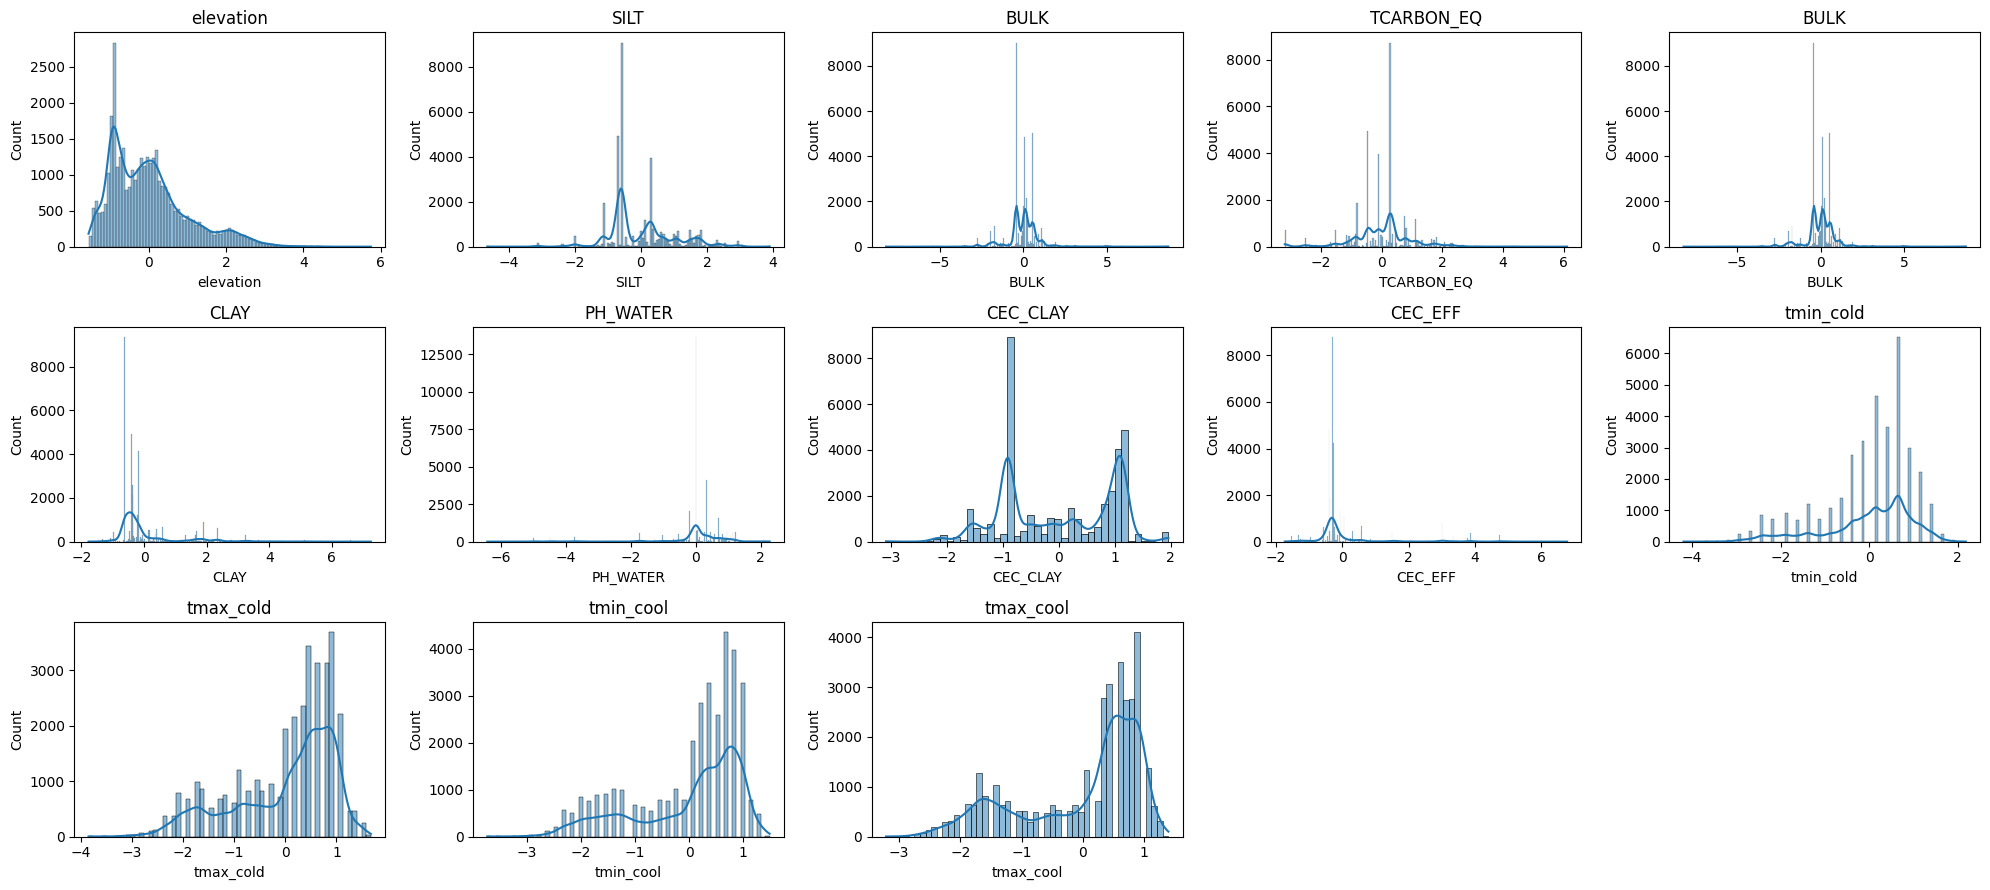

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Get the list of numerical features from the 'num_features' variable
# The num_features variable is already defined in the kernel state

# Calculate grid dimensions dynamically
num_plots = len(num_features)
num_cols = 5 # Maximum 5 columns for better readability
num_rows = math.ceil(num_plots / num_cols)

plt.figure(figsize=(num_cols * 4, num_rows * 3))
for i, col in enumerate(num_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(X_train_scaled[col], kde=True) # Assuming X_train_scaled is the dataframe with scaled features
    plt.title(col)
    plt.tight_layout()
plt.show()

In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35680 entries, 1396549 to 789671
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   elevation      35680 non-null  float64
 1   prec_spring    35680 non-null  float64
 2   prec_autumn    35680 non-null  float64
 3   prec_winter    35680 non-null  float64
 4   lcccode_label  35680 non-null  float64
 5   prec_summer    35680 non-null  float64
 6   CEC_CLAY       35680 non-null  float64
 7   PH_WATER       35680 non-null  float64
 8   CEC_EFF        35680 non-null  float64
 9   TCARBON_EQ     35680 non-null  float64
 10  TEB            35680 non-null  float64
 11  CLAY           35680 non-null  float64
 12  SILT           35680 non-null  float64
 13  BULK           35680 non-null  float64
 14  ELEC_COND      35680 non-null  float64
 15  tmax_cool      35680 non-null  float64
 16  tmax_cold      35680 non-null  float64
 17  tmin_cool      35680 non-null  float64
 18  tmin

### feature Extraction

#### extract strongly correlated features

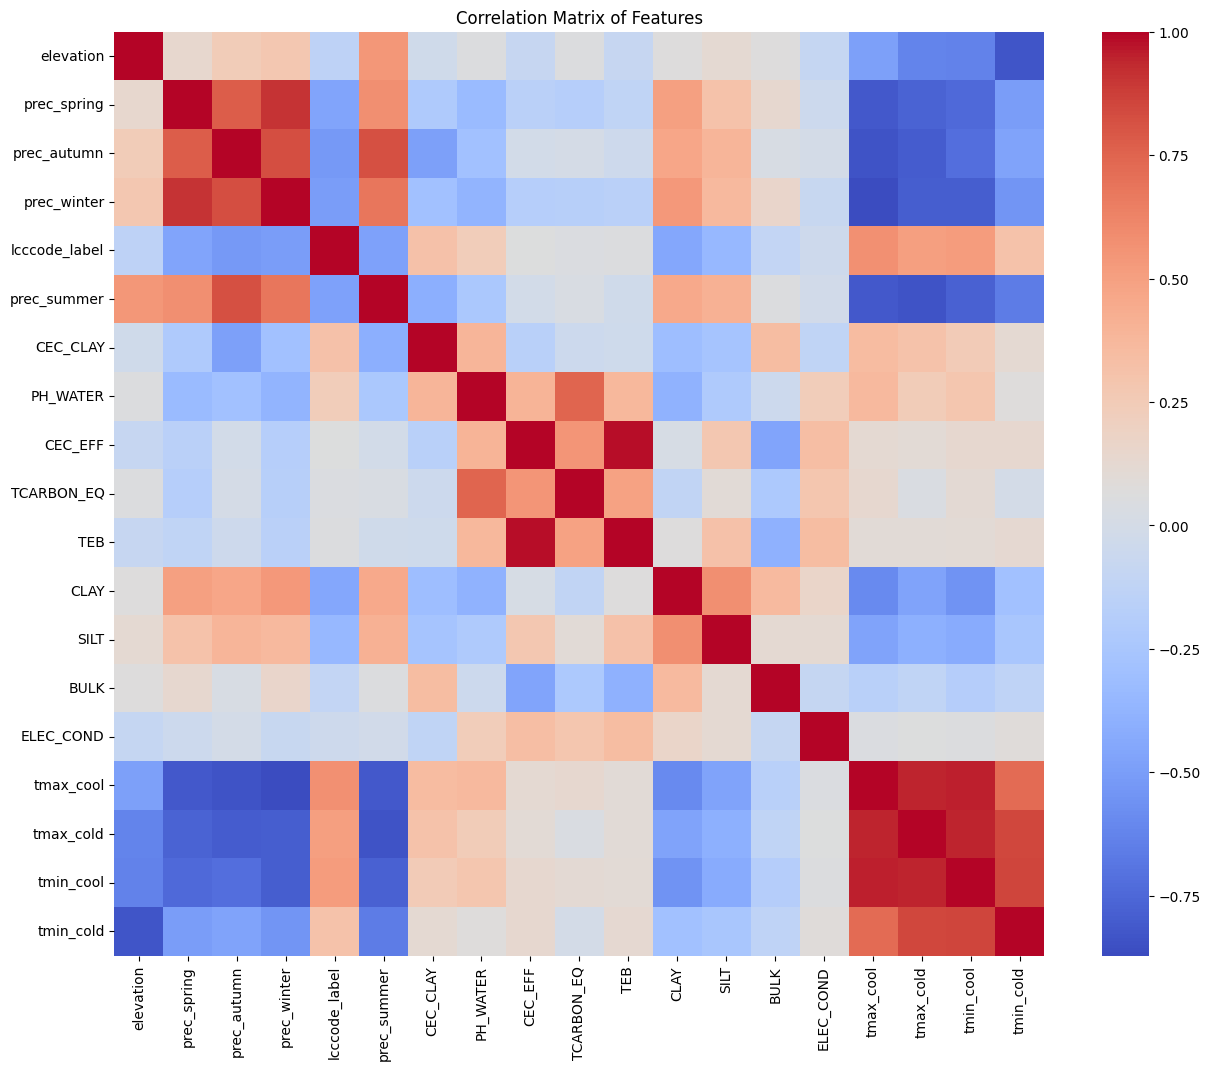

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric features for correlation
# Exclude target 'fire'
numeric_features =X_train

# Calculate correlation matrix
corr_matrix = numeric_features.corr()

# Plot correlation heatmap
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


In [24]:
import pandas as pd
import numpy as np
# Set correlation threshold
threshold = 0.95

# Select upper triangle of correlation matrix (to avoid duplicates)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than threshold
strong_corr_pairs = [(col, row, upper.loc[row, col])
                     for col in upper.columns
                     for row in upper.index
                     if (upper.loc[row, col] > threshold)]

# Convert to DataFrame for easier visualization
strong_corr_df = pd.DataFrame(strong_corr_pairs, columns=['Feature_1', 'Feature_2', 'Correlation'])

print(strong_corr_df)


   Feature_1  Feature_2  Correlation
0        TEB    CEC_EFF     0.982235
1  tmin_cool  tmax_cool     0.954396


#### pca between tmin and tmax

In [25]:
from sklearn.decomposition import PCA
import pandas as pd

temp_features = X_train[['tmax_cool','tmin_cool']]
pca = PCA(n_components=0.95)
temp_pca = pca.fit_transform(temp_features)
print("Number of components:", pca.n_components_)
print("Explained variance:", pca.explained_variance_ratio_)


Number of components: 1
Explained variance: [0.97719811]


In [26]:
X_train['temp_PC']=temp_pca[:,0]
X_train=X_train.drop(columns=['tmax_cool','tmin_cool'])

#### for TEB and cec_EFF

In [27]:
ref_TEB_EFF_features = X_train[['TEB','CEC_EFF']]
pca_TEB=PCA(n_components=0.95)
TEB_pc=pca_TEB.fit_transform(ref_TEB_EFF_features)
print("Number of components:", pca_TEB.n_components_)
print("Explained variance:", pca_TEB.explained_variance_ratio_)
X_train['TEB_PC1']=TEB_pc[:,0]
X_train=X_train.drop(columns=['TEB','CEC_EFF'])

Number of components: 1
Explained variance: [0.99987396]


In [28]:
X_train.head()

,elevation,prec_spring,prec_autumn,prec_winter,lcccode_label,prec_summer,CEC_CLAY,PH_WATER,TCARBON_EQ,CLAY,SILT,BULK,ELEC_COND,tmax_cold,tmin_cold,temp_PC,TEB_PC1
1396549,-1.370784,0.800395,0.522263,0.284608,6.0,-1.815248,-1.286759,2.101072,2.085113,1.327443,-0.034676,0.318472,14.0,0.629322,0.908152,0.422734,25.534352
4497,-1.008642,0.162275,-0.021667,-0.188522,19.0,-0.208992,1.961555,1.134918,0.006512,-0.605766,0.066171,-0.148866,1.0,0.330478,0.653210,0.897225,3.077587
2270,0.087662,-0.307782,-1.504811,-0.545315,18.0,-0.729690,1.153963,-0.001731,-0.440869,-0.404390,-0.690187,0.110764,1.0,0.928165,-0.111616,0.840992,-3.936417
997910,0.390545,-0.500819,0.129372,-0.290493,19.0,0.117172,0.804007,0.708675,0.378182,0.139325,1.024225,0.863700,2.8,0.031635,-0.366558,0.115546,3.476893
196217,-0.011104,-0.745725,-1.504811,-0.545315,18.0,-0.729690,0.965525,-0.200645,-0.829747,-0.384253,-1.144002,0.240581,2.3,0.778743,0.143326,0.645572,-3.535243


## Feature engineering (for test data)

### feature selection

In [30]:
X_test=X_test.drop(columns=['longitude','latitude'])

In [29]:
X_test=X_test[selected]

In [31]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8920 entries, 6129 to 1134010
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   elevation      8920 non-null   float64
 1   prec_spring    8920 non-null   int64  
 2   prec_autumn    8920 non-null   int64  
 3   prec_winter    8920 non-null   int64  
 4   tmin_summer    8920 non-null   int64  
 5   tmin_autumn    8920 non-null   int64  
 6   lcccode_label  8920 non-null   float64
 7   prec_summer    8920 non-null   int64  
 8   tmax_summer    8920 non-null   int64  
 9   tmax_autumn    8920 non-null   int64  
 10  tmax_spring    8920 non-null   int64  
 11  tmin_winter    8920 non-null   int64  
 12  tmax_winter    8920 non-null   int64  
 13  CEC_CLAY       8920 non-null   float64
 14  tmin_spring    8920 non-null   int64  
 15  PH_WATER       8920 non-null   float64
 16  CEC_EFF        8920 non-null   float64
 17  TCARBON_EQ     8920 non-null   float64
 18  TEB    

### feature scaling

In [ ]:
# X_test[skewed_features]=pt_bc.transform(X_test[skewed_features])


In [32]:
tmin_cols=['tmin_autumn','tmin_spring','tmin_summer','tmin_winter']
tmax_cols=['tmax_autumn','tmax_spring','tmax_summer','tmax_winter']
X_test['tmax_cool']=X_test[['tmax_summer','tmax_spring']].mean(axis=1)
X_test['tmax_cold']=X_test[['tmax_autumn','tmax_winter']].mean(axis=1)
X_test['tmin_cool']=X_test[['tmin_summer','tmin_spring']].mean(axis=1)
X_test['tmin_cold']=X_test[['tmin_autumn','tmin_winter']].mean(axis=1)
X_test=X_test.drop(columns=tmin_cols+tmax_cols)
X_test.head()

,elevation,prec_spring,prec_autumn,prec_winter,lcccode_label,prec_summer,CEC_CLAY,PH_WATER,CEC_EFF,TCARBON_EQ,TEB,CLAY,SILT,BULK,ELEC_COND,tmax_cool,tmax_cold,tmin_cool,tmin_cold
6129,195.0,15,9,7,19.0,1,51.0,7.80,31.5,10.10,24.0,15.0,27.5,1.410,1.0,38.5,27.5,22.5,13.5
468619,308.0,7,6,10,18.0,1,74.0,7.80,30.0,8.00,30.0,16.0,27.0,1.430,1.0,37.5,27.5,21.5,11.5
985815,495.0,5,14,3,3.0,1,70.1,8.05,37.0,10.38,37.4,18.7,33.8,1.459,2.8,35.5,24.0,21.0,11.5
52725,370.0,0,31,5,19.0,2,57.4,7.96,34.1,11.62,29.6,16.2,29.7,1.426,1.0,37.5,28.5,23.0,14.5
528678,578.0,2,17,13,18.0,2,51.0,7.80,31.5,10.10,24.0,15.0,27.5,1.410,1.0,37.5,27.5,22.0,13.0


In [33]:
X_test[num_features]=scaler.transform(X_test[num_features])

In [34]:
X_test.head()

,elevation,prec_spring,prec_autumn,prec_winter,lcccode_label,prec_summer,CEC_CLAY,PH_WATER,CEC_EFF,TCARBON_EQ,TEB,CLAY,SILT,BULK,ELEC_COND,tmax_cool,tmax_cold,tmin_cool,tmin_cold
6129,-0.811109,15,9,7,19.0,1,-0.909883,-0.001732,-0.299184,0.281823,24.0,-0.605766,-0.564127,-0.408499,1.0,0.925942,0.928165,0.855893,1.163094
468619,-0.439090,7,6,10,18.0,1,1.153963,-0.001731,-0.394347,-0.440869,30.0,-0.404390,-0.690187,0.110764,1.0,0.689340,0.928165,0.539765,0.143326
985815,0.176551,5,14,3,3.0,1,0.804007,0.708675,0.049745,0.378182,37.4,0.139325,1.024225,0.863700,2.8,0.216135,-0.117787,0.381701,0.143326
52725,-0.234974,0,31,5,19.0,2,-0.335595,0.452928,-0.134236,0.804915,29.6,-0.364115,-0.009464,0.006913,1.0,0.689340,1.227008,1.013957,1.672978
528678,0.449804,2,17,13,18.0,2,-0.909883,-0.001732,-0.299184,0.281823,24.0,-0.605766,-0.564127,-0.408499,1.0,0.689340,0.928165,0.697829,0.908152


### feature extraction

In [35]:
X_test[prec_cols] = pt_yj.transform(X_test[prec_cols])


In [36]:
temp_features_t=X_test[['tmax_cool','tmin_cool']]
temp_pca_t=pca.transform(temp_features_t)
X_test['temp_PC']= temp_pca_t[:,0]



In [37]:
X_test=X_test.drop(columns=['tmax_cool','tmin_cool'])

In [38]:
TEB_pc_t=pca_TEB.transform(X_test[['TEB','CEC_EFF']])
X_test['TEB_PC1']=TEB_pc_t[:,0]

In [39]:
X_test=X_test.drop(columns=['TEB','CEC_EFF'])

In [40]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8920 entries, 6129 to 1134010
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   elevation      8920 non-null   float64
 1   prec_spring    8920 non-null   float64
 2   prec_autumn    8920 non-null   float64
 3   prec_winter    8920 non-null   float64
 4   lcccode_label  8920 non-null   float64
 5   prec_summer    8920 non-null   float64
 6   CEC_CLAY       8920 non-null   float64
 7   PH_WATER       8920 non-null   float64
 8   TCARBON_EQ     8920 non-null   float64
 9   CLAY           8920 non-null   float64
 10  SILT           8920 non-null   float64
 11  BULK           8920 non-null   float64
 12  ELEC_COND      8920 non-null   float64
 13  tmax_cold      8920 non-null   float64
 14  tmin_cold      8920 non-null   float64
 15  temp_PC        8920 non-null   float64
 16  TEB_PC1        8920 non-null   float64
dtypes: float64(17)
memory usage: 1.2 MB


## Oversampling fire instances

### Random Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
over_sampling_strategy = 0.6
ros = RandomOverSampler(sampling_strategy=over_sampling_strategy)
X_res_o, y_res_o = ros.fit_resample(X_res, y_res)
ax=y_res_o.value_counts().plot.pie()
_ = ax.set_title("Random Over-sampling")
X_res_o.shape, y_res_o.shape, y_res_o.sum()

In [ ]:
#save in df_balanced_or
df_balanced_or = pd.concat([X_res_o, y_res_o], axis=1)

###  smote

((40806, 17), (40806,), np.int64(20403))

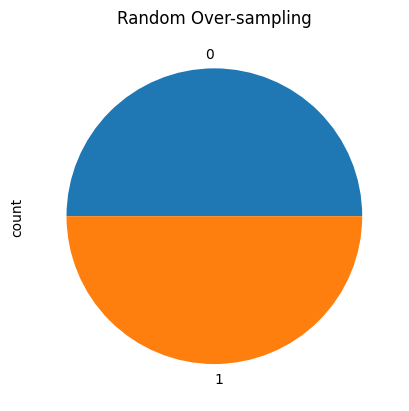

In [ ]:
from imblearn.over_sampling import SMOTE
rosks =SMOTE(random_state=42)
X_res_oks, y_res_oks = rosks.fit_resample(X_train, y_train)
ax=y_res_oks.value_counts().plot.pie()
_ = ax.set_title("Random Over-sampling")
X_res_oks.shape, y_res_oks.shape, y_res_oks.sum()

In [ ]:
test = pd.concat([X_res_oks, y_res_oks], axis=1)
test['fire'].value_counts()

,count
fire,
0,20403
1,20403


In [ ]:
X_train=X_res_oks
y_train=y_res_oks

In [ ]:
#save in df_balanced_os
df_balanced_os = pd.concat([X_res_oks, y_res_oks], axis=1)
df_balanced_os['fire'].value_counts()
X=df_balanced_os.drop(columns=['fire'])
y=df_balanced_os['fire']

### KmeansSMOTE

In [ ]:
X_train=X_train.drop(columns=['fire'])

In [ ]:
X_train.info()

In [ ]:
from imblearn.over_sampling import KMeansSMOTE
rosks =KMeansSMOTE(sampling_strategy=0.5,cluster_balance_threshold=0.01)
X_res_o, y_res_o = rosks.fit_resample(X_train, y_train)
ax=y_res_o.value_counts().plot.pie()
_ = ax.set_title("KMeansSMOTE Over-sampling")
X_res_o.shape, y_res_o.shape, y_res_o.sum()

In [ ]:
balanced=pd.concat([X_res_o,y_res_o],axis=1)
balanced['fire'].value_counts()

## Combination between Undersampling and Oversampling

#### SMOTE + TOMEK

In [ ]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(sampling_strategy=0.3)
X_res_ou, y_res_ou = smote_tomek.fit_resample(X_train, y_train)
ax=y_res_ou.value_counts().plot.pie()
_ = ax.set_title("Combination SMOTE+TOMEK")
X_res_ou.shape, y_res_ou.shape, y_res_ou.sum()


## Supervised models


In [42]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.6 MB/s eta 0:00:00


In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer


### RF

In [47]:
# Define search space for Random Forest using Bayesian Optimization
search_spaces = {
    'n_estimators': Integer(100, 500),
    'max_depth': Categorical([None, 10, 20, 30, 40]),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10),
    'max_features': Categorical(['sqrt', 'log2']),
    'class_weight': Categorical(['balanced'])
}

In [45]:
# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# BayesSearchCV with cross-validation
bayes_search = BayesSearchCV(
    estimator=rf,
    search_spaces=search_spaces,
    n_iter=50,  # Number of parameter settings sampled
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=2,
    random_state=42,
    return_train_score=True
)

In [48]:
print("\nRunning Bayesian Optimization...")
print("This intelligently searches the parameter space...")
bayes_search.fit(X_train, y_train)




Running Bayesian Optimization...
This intelligently searches the parameter space...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 

BayesSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
              n_jobs=-1, random_state=42, return_train_score=True,
              scoring='accuracy',
              search_spaces={'bootstrap': Categorical(categories=(True, False), prior=None),
                             'criterion': Categorical(categories=('gini', 'entropy'), prior=None),
                             'max_depth': Integer(low=3, high=30, prior='uniform', transform='normalize'),
                             'max_features': Categorical(categories=('sqrt', 'log2', None), prior=None),
                             'min_samples_leaf': Integer(low=1, high=15, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=30, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=50, high=500, prior='uniform', transform='normalize')},
              verbose=2)

In [49]:
# Display results
print("\n" + "=" * 80)
print("BEST PARAMETERS FOUND")
print("=" * 80)
for param, value in bayes_search.best_params_.items():
    print(f"{param}: {value}")

# Cross-validation score
print(f"\n{'=' * 80}")
print(f"Cross-Validation Score (Mean): {bayes_search.best_score_:.4f}")
print(f"{'=' * 80}")



BEST PARAMETERS FOUND
bootstrap: True
criterion: entropy
max_depth: 19
max_features: sqrt
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 500

Cross-Validation Score (Mean): 0.9432


In [50]:
# Get the best model
best_rf = bayes_search.best_estimator_

# Predictions on test set
y_pred = best_rf.predict(X_test)
# Detailed classification report
print(f"\n{'=' * 80}")
print("CLASSIFICATION REPORT")
print("=" * 80)
print(classification_report(y_test, y_pred))



CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6420
           1       0.91      0.89      0.90      2500

    accuracy                           0.94      8920
   macro avg       0.93      0.93      0.93      8920
weighted avg       0.94      0.94      0.94      8920

